In [116]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=中国科学院武汉病毒研究所&output=json&rows=50000"

In [117]:
response = requests.get(url).json()

In [118]:
response

{'responseHeader': {'status': 0,
  'QTime': 327,
  'params': {'query': '( (title:中国科学院武汉病毒研究所^100 OR salients:中国科学院武汉病毒研究所^50 OR subject:中国科学院武汉病毒研究所^25 OR description:中国科学院武汉病毒研究所^15 OR collection:中国科学院武汉病毒研究所^10 OR language:中国科学院武汉病毒研究所^10 OR text:中国科学院武汉病毒研究所^1) )',
   'qin': '中国科学院武汉病毒研究所',
   'fields': '_default_',
   'wt': 'json',
   'rows': '50000',
   'start': 0}},
 'response': {'numFound': 16,
  'start': 0,
  'docs': [{'btih': '3c06c78ad06d07394d10c72fb650e760f12c1f51',
    'collection': ['opensource', 'community'],
    'creator': '法国国际广播电台（法語：Radio France Internationale，缩写：RFI）',
    'date': '2020-06-09T00:00:00Z',
    'description': '美国 哈佛医学院根据到医院就诊的卫星图像和搜索引擎数据进行的研究显示，新型冠状病毒可能最早是在2019年8月于中国传播。 据路透社今天报道称，哈佛研究显示新冠病毒可能早在去年8月就已在武汉传播。 据哈佛的研究说，“在2019年12月正式有新冠病毒疫情记录之前，武汉民众到医院就诊、以及有关症状的网络搜索就已经增多，” 据该研究显示说，“虽然我们不能证实这些迹象的增加与新冠直接有关，但我们的证据支持了最近的其他研究，这些研究表明在确定华南海鲜市场之前，病毒就已经出现。”',
    'downloads': 17,
    'format': ['Archive BitTorrent', 'HTML', 'Metadata'],
    'identifier': '8_20200609_

In [119]:
response['response']['docs'][1]['publicdate']

'2020-06-02T19:24:02Z'

In [120]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [121]:
dates

['2020-06-09T17:29:37Z',
 '2020-06-02T19:24:02Z',
 '2020-04-24T17:34:24Z',
 '2020-05-22T22:28:11Z',
 '2020-05-14T03:11:44Z',
 '2020-06-06T11:15:54Z',
 '2020-02-03T10:00:58Z',
 '2020-05-20T08:18:41Z',
 '2020-05-22T22:50:46Z',
 '2020-06-02T17:26:25Z',
 '2020-05-03T19:59:32Z',
 '2020-05-03T19:48:39Z',
 '2020-04-24T19:21:51Z',
 '2020-04-30T01:31:30Z',
 '2020-05-21T22:25:31Z',
 '2020-05-03T20:08:20Z',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [122]:
dates = [x for x in dates if x]

In [123]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [124]:
dates

['2020-06-09T17:29:37Z',
 '2020-06-02T19:24:02Z',
 '2020-04-24T17:34:24Z',
 '2020-05-22T22:28:11Z',
 '2020-05-14T03:11:44Z',
 '2020-06-06T11:15:54Z',
 '2020-02-03T10:00:58Z',
 '2020-05-20T08:18:41Z',
 '2020-05-22T22:50:46Z',
 '2020-06-02T17:26:25Z',
 '2020-05-03T19:59:32Z',
 '2020-05-03T19:48:39Z',
 '2020-04-24T19:21:51Z',
 '2020-04-30T01:31:30Z',
 '2020-05-21T22:25:31Z',
 '2020-05-03T20:08:20Z']

In [125]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2018':
            del dates[i]
            newdates=len(dates)

In [126]:
len(dates)

16

In [127]:
min(dates)

'2020-02-03T10:00:58Z'

In [128]:
max(dates)

'2020-06-09T17:29:37Z'

In [114]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [90]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [91]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [92]:
df1.set_index('DATE', inplace=True)

In [93]:
df1

,Count
DATE,
2020-01-24,1
2020-01-28,1
2020-02-12,6
2020-02-15,1
2020-02-18,1
...,...
2021-07-04,12
2021-07-16,2
2021-07-29,1


In [94]:
# drop the first row if nonsense
# df1.drop(df1.index[0],inplace=True)

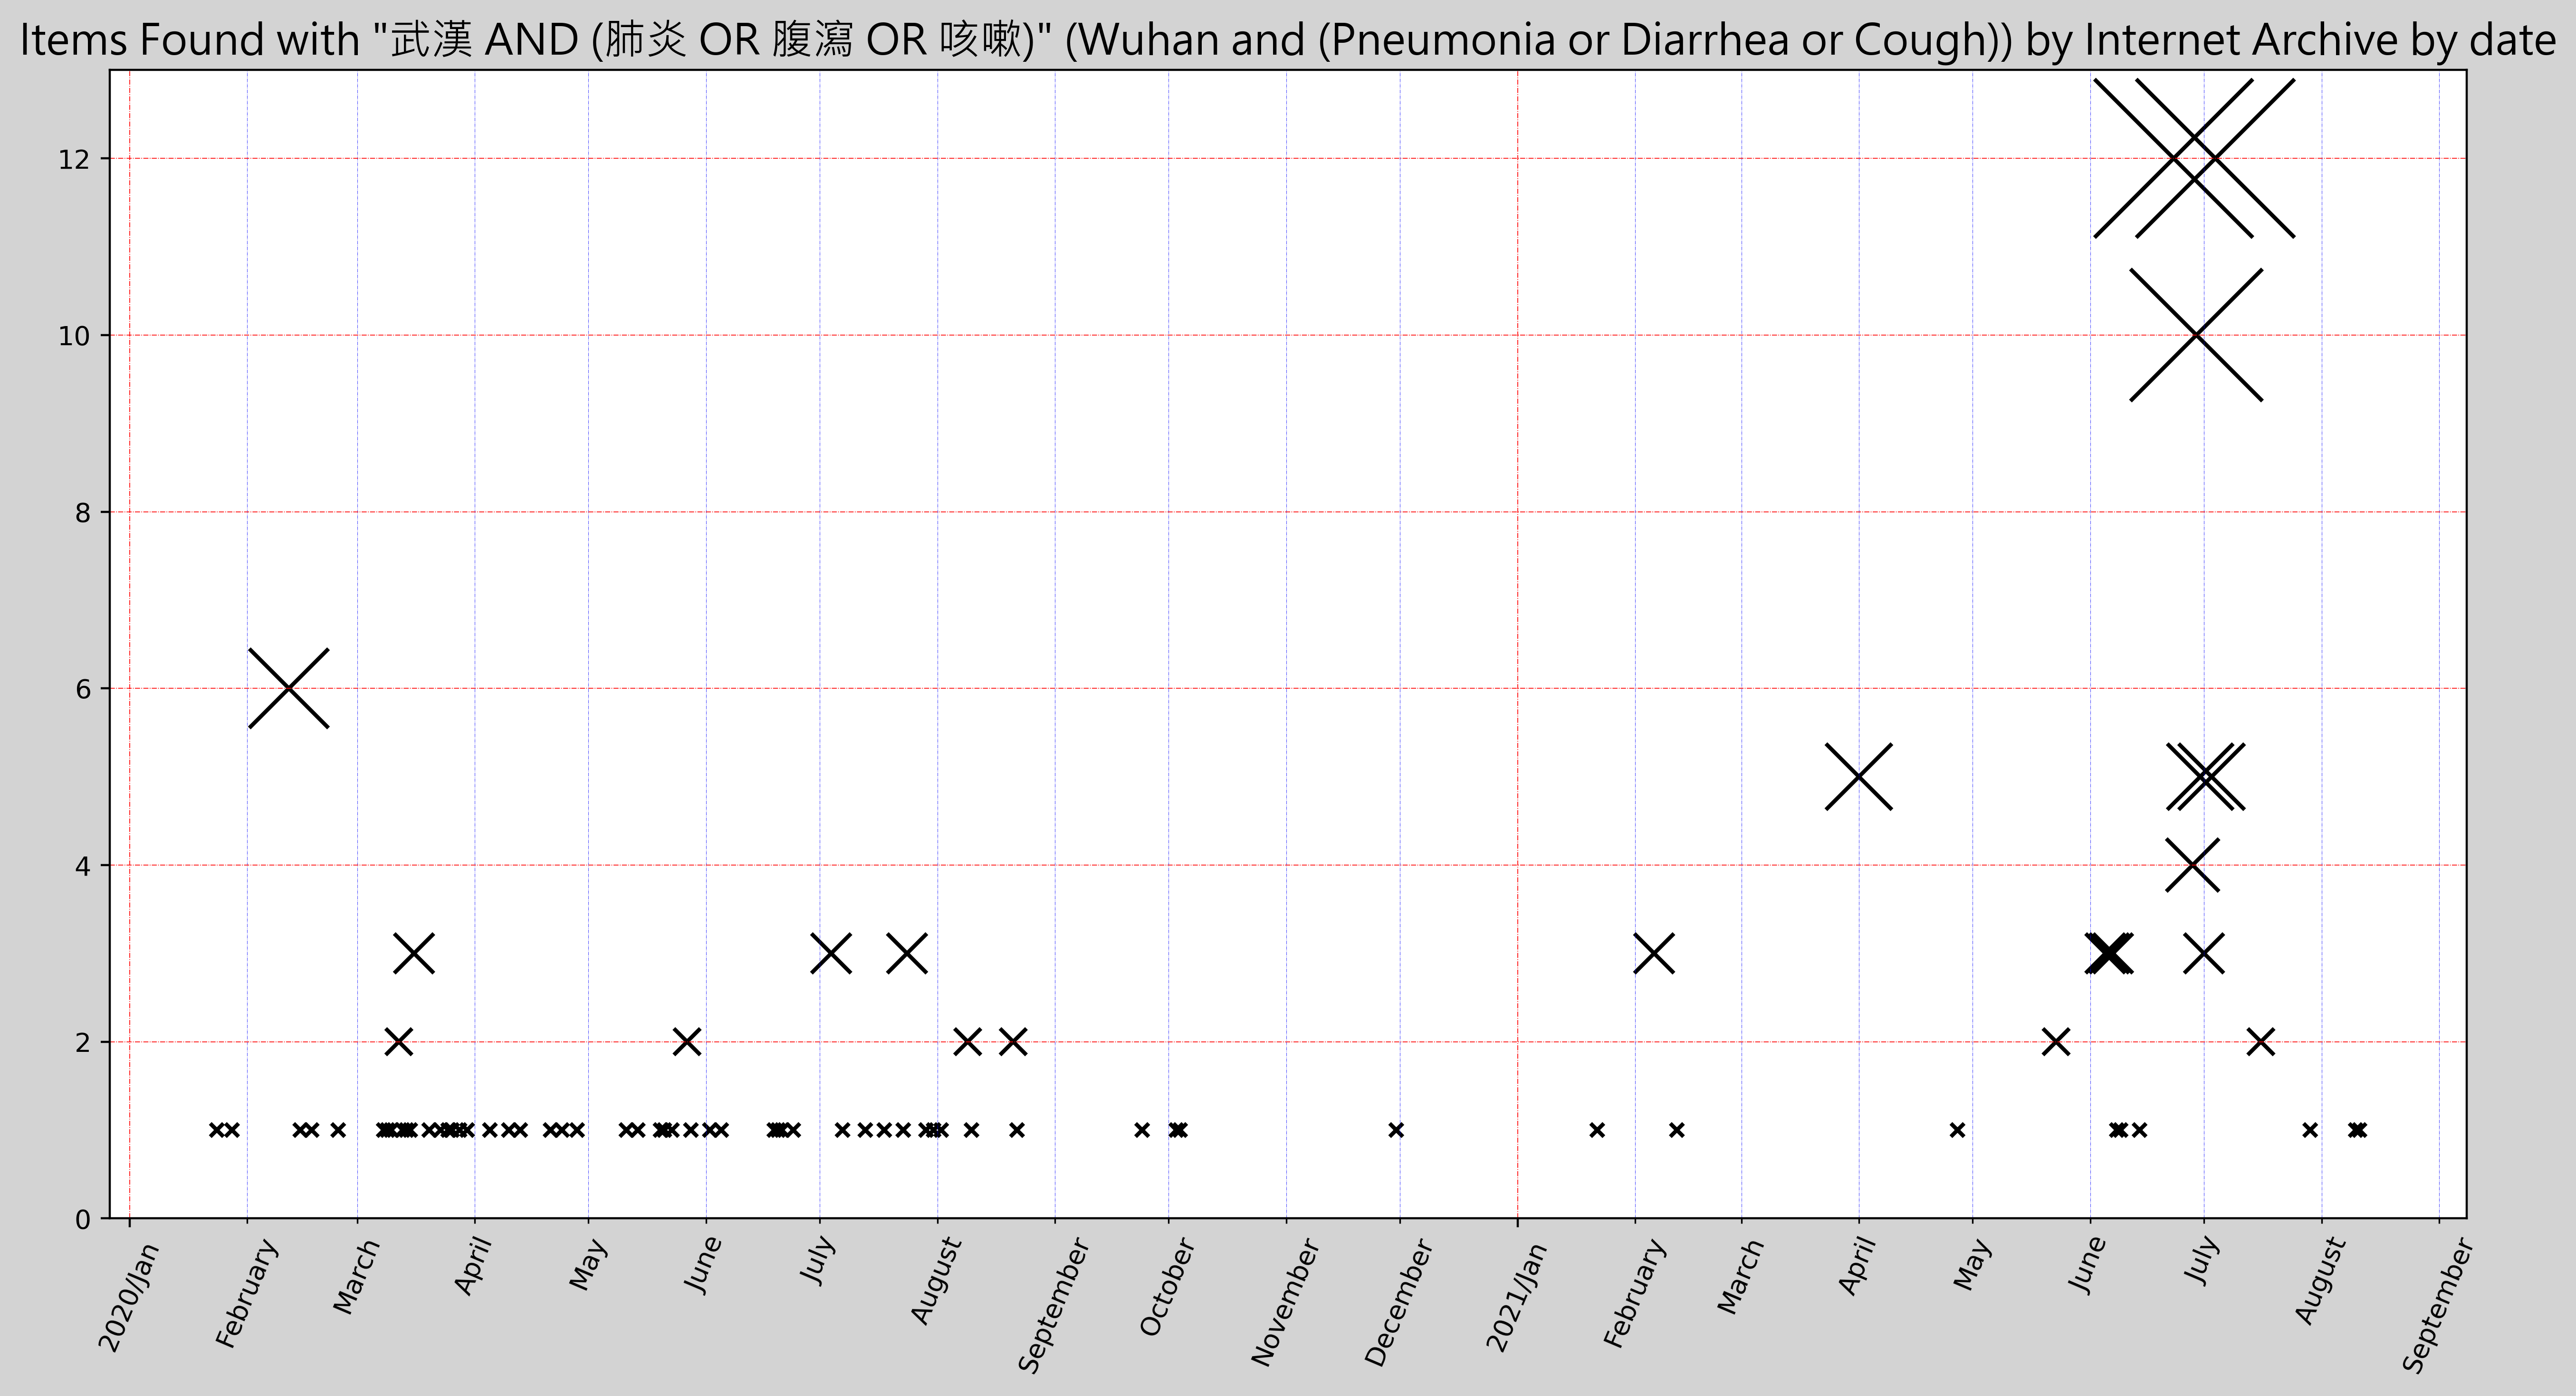

In [97]:
%matplotlib inline
x = df1.index
y = df1['Count']
tfont = {'fontname':'Microsoft JhengHei'}
fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*y*25,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=13,bottom=0)
plt.title('Items Found with "武漢 AND (肺炎 OR 腹瀉 OR 咳嗽)" (Wuhan and (Pneumonia or Diarrhea or Cough)) by Internet Archive by date',**tfont,size=14)


plt.show()
plt.close()

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "武漢 AND (肺炎 OR 腹瀉 OR 咳嗽)" (Wuhan and (Pneumonia or Diarrhea or Cough)) by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()